In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


--------------------------------------#Import Libraries-------------------

#torch: PyTorch library, used for building and training machine learning models, especially deep learning. It supports operations on tensors, automatic differentiation, and much more.

#torchvision: A package that provides popular datasets, model architectures, and image transformations for computer vision.

#matplotlib.pyplot: Used to plot and visualize images or data. In this case, it is used to show images from the dataset.

#datasets: A module from torchvision that provides easy access to popular datasets, including MNIST.

#transforms: A module for applying various image transformations (such as resizing, rotating, converting to tensors).

#DataLoader: A PyTorch utility for loading datasets into batches, allowing for efficient iteration during training or testing.

In [4]:
transform = transforms.Compose([
    transforms.RandomRotation(10),  # Rotate by 10 degrees
    transforms.RandomHorizontalFlip(),  # Flip images horizontally with 50% probability
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset (mean=0.5, std=0.5)
])


--------------------------#Define Image Transformations-------------------------

#transforms.Compose: Combines several transformations into one. The list inside defines the sequence in which they are applied.

#RandomRotation(10): Randomly rotates the image by up to 10 degrees (either clockwise or counterclockwise). This is used as data 
 augmentation, which helps make the model more robust by showing it different perspectives of the same image.
 
#RandomHorizontalFlip(): Flips the image horizontally with a probability of 50%. Again, this is a type of
 augmentation to simulate different viewing angles.
 
#ToTensor(): Converts the image (which is usually a NumPy array or PIL Image) into a PyTorch tensor.

 A tensor is a multi-dimensional array, which is the fundamental data structure in PyTorch.
 
#Normalize((0.5,), (0.5,)): This normalizes the image by adjusting the pixel values to have a mean
of 0.5 and a standard deviation of 0.5. Normalization helps the model converge faster during training.

In [6]:
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)


----------------------#Load the Dataset----------------

#datasets.MNIST: Loads the MNIST dataset, which contains images of handwritten digits (0-9). Each image is 28x28 pixels.

#root='./data': Specifies the directory where the dataset will be saved. In this case, the ./data directory will store it.

#train=True: Indicates that we are loading the training set. Setting it to False would load the test set.

#transform=transform: Applies the transformations (rotation, flip, normalization, etc.) defined earlier to each image in the dataset.

#download=True: If the dataset is not already downloaded in the specified directory, it will be automatically downloaded.

In [8]:
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)


---------------------------#Create a DataLoader------------------------

#DataLoader: Combines the dataset and allows iteration over it in mini-batches, which is useful for efficient training or evaluation.

#dataset: The MNIST dataset we just loaded.

#batch_size=10: The DataLoader will return batches of 10 images and labels at a time. Training in batches is more efficient
and reduces memory usage.

#shuffle=True: Randomly shuffles the dataset before creating the batches. Shuffling helps ensure that the model doesn't learn
patterns in the order of the data.

In [10]:
def show_images(images, labels, num_images=10):
    num_cols = 5  # Number of images per row
    num_rows = num_images // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(28, 28))  # Adjust grid size based on number of images
    axes = axes.flatten()  # Flatten to easily iterate over
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].squeeze(), cmap='gray')  # Remove extra dimensions and show as grayscale
        ax.set_title(f'Label: {labels[i]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()


------------------#Function to Show Images in a Grid--------------------------

#show_images(images, labels, num_images=10): This function displays a grid of images with their corresponding labels. 

#images: A batch of images (a tensor).

#labels: A batch of corresponding labels (integers representing the digit each image contains).

#num_images: The number of images to display. The default is 10.

#num_cols = 5: Sets the number of images per row in the grid.

#num_rows = num_images // num_cols: Calculates the number of rows needed for the grid based on the total number of images.

#plt.subplots(num_rows, num_cols): Creates a grid of subplots where the images will be displayed.

#axes.flatten(): Flattens the grid into a one-dimensional array, making it easier to iterate over.

#images[i].squeeze(): Removes unnecessary dimensions from the image tensor (e.g., from (1, 28, 28) to (28, 28)).

#ax.imshow(..., cmap='gray'): Displays the image as grayscale.

#ax.set_title(f'Label: {labels[i]}'): Sets the title of each subplot to the corresponding label.

#ax.axis('off'): Hides the axis, making the visualization cleaner.

#plt.tight_layout(): Adjusts the spacing between the subplots to prevent overlap.

#plt.show(): Displays the plot.

In [12]:
def show_single_image(image, label):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()


---------------------#Function to Show a Single Image------------------------

#This function is similar to show_images but displays just one image and its label

In [14]:
def save_images(images, labels, folder='./saved_images'):
    import os
    os.makedirs(folder, exist_ok=True)
    for i in range(len(images)):
        image = images[i].squeeze().numpy()
        plt.imsave(f"{folder}/image_{i}_label_{labels[i]}.png", image, cmap='gray')


----------------#Function to Save Images to a Folder---------------------

#os.makedirs(folder, exist_ok=True): Creates the saved_images folder if it doesn't already exist.

#for i in range(len(images)): Loops through each image in the batch.

#image.squeeze().numpy(): Converts the image from a PyTorch tensor to a NumPy array, which is needed for saving.

#plt.imsave(...): Saves each image as a PNG file in the specified folder, with filenames like image_0_label_1.png.

In [16]:
data_iter = iter(dataloader)
images, labels = next(data_iter)


--------------------#Get a Batch of Images and Labels-----------------

#iter(dataloader): Converts the DataLoader into an iterator, allowing us to retrieve batches of data.

#next(data_iter): Retrieves the next batch of images and labels (10 in this case, since batch_size=10).

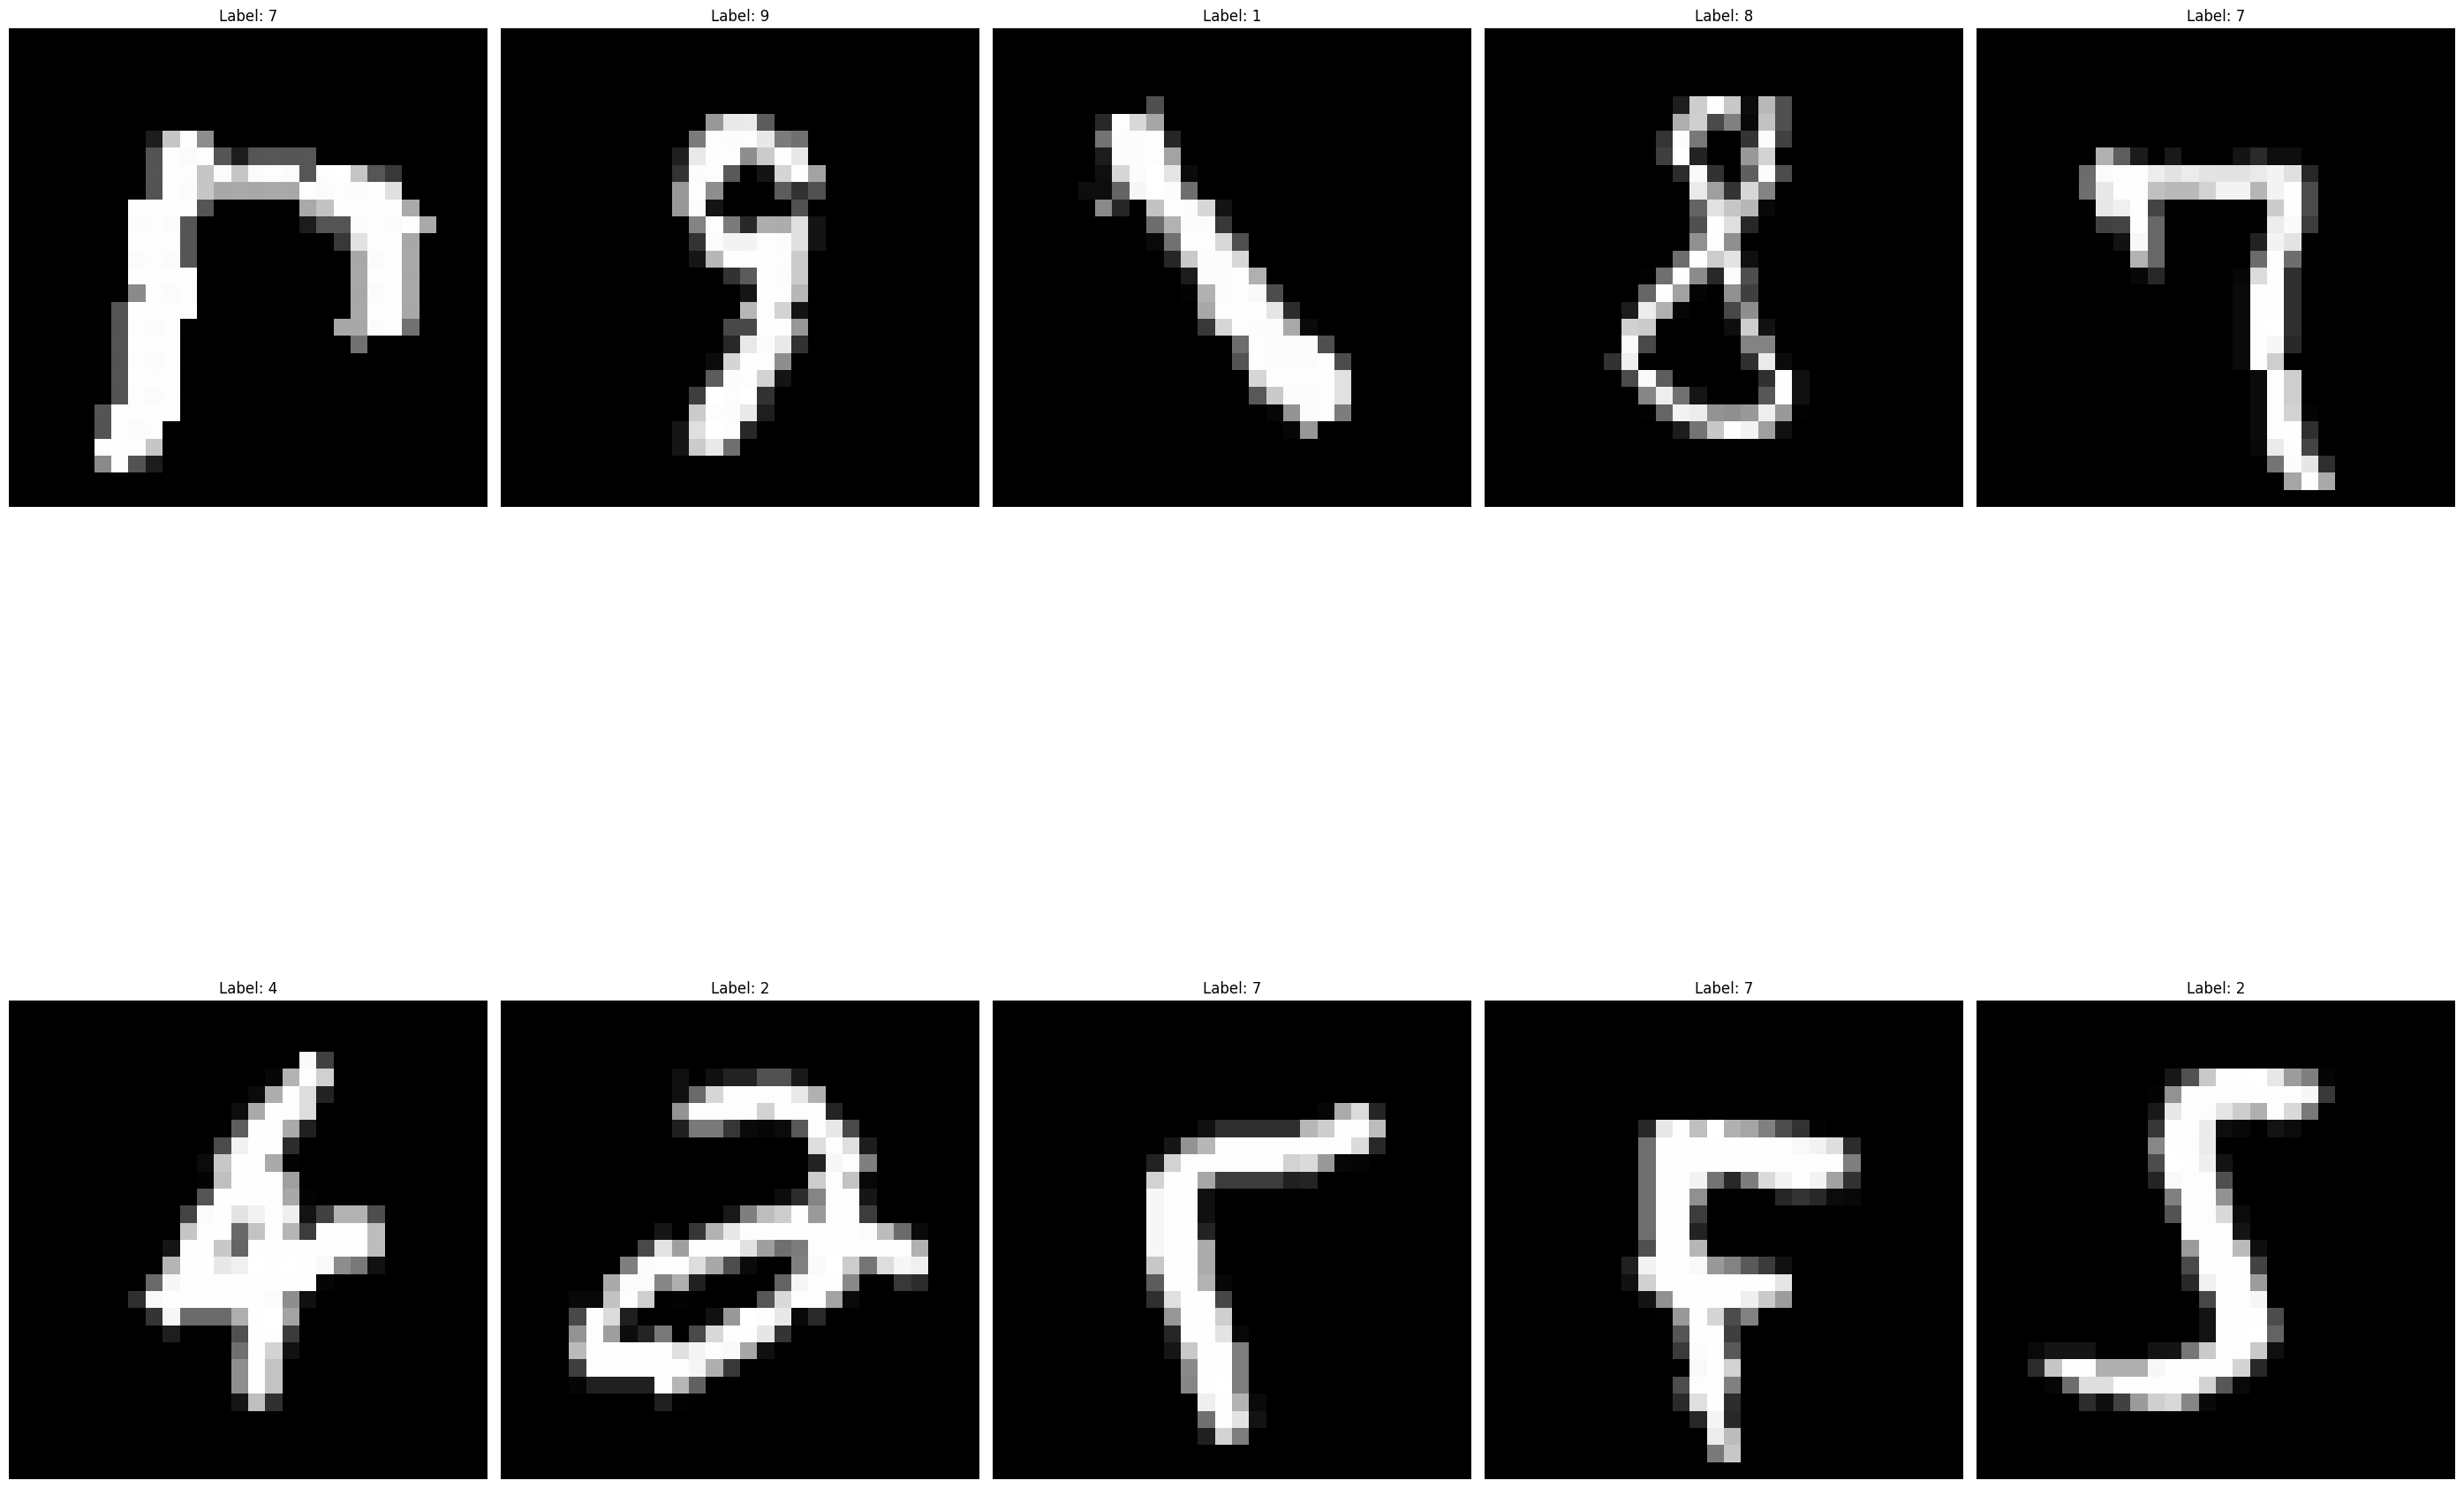

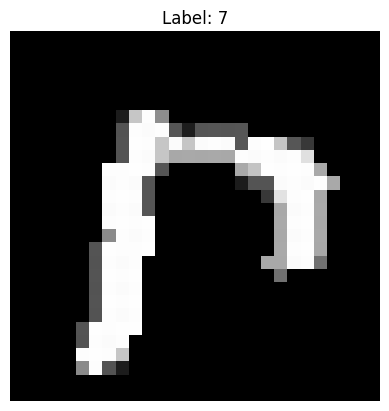

In [18]:
# Display a batch of 10 images
show_images(images, labels, num_images=10)

# Display a single image
show_single_image(images[0], labels[0])

# Save images to folder
save_images(images, labels)


------------------------------#Display and Save Images------------------------

#show_images(images, labels, num_images=10): Displays the batch of 10 images with their labels.

#show_single_image(images[0], labels[0]): Displays the first image in the batch along with its label.

#save_images(images, labels): Saves the batch of images to the saved_images folder, with each image labeled by its corresponding class.